In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_json('news.json',lines=True)

In [4]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [5]:
df.shape

(200853, 6)

In [6]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [7]:
df['authors'].unique()

array(['Melissa Jeltsen', 'Andy McDonald', 'Ron Dicker', ...,
       'Courtney Garcia, Contributor\nI tell stories and drink wine.',
       'Mateo Gutierrez, Contributor\nArtist',
       'John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff'],
      dtype=object)

In [8]:
df['link'].unique()

array(['https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
       'https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201',
       'https://www.huffingtonpost.com/entry/hugh-grant-marries_us_5b09212ce4b0568a880b9a8c',
       ...,
       'https://www.huffingtonpost.com/entry/super-bowl-upsets-the-mos_us_5bb69b1de4b097869fd1b26d',
       'https://www.huffingtonpost.com/entry/aldon-smith-arrested-dui-49ers_us_5bb69b25e4b097869fd1b33c',
       'https://www.huffingtonpost.com/entry/dwight-howard-rips-teammates-magic-hornets_us_5bb69b24e4b097869fd1b331'],
      dtype=object)

In [9]:
coun=df['category'].value_counts()
print(coun)

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

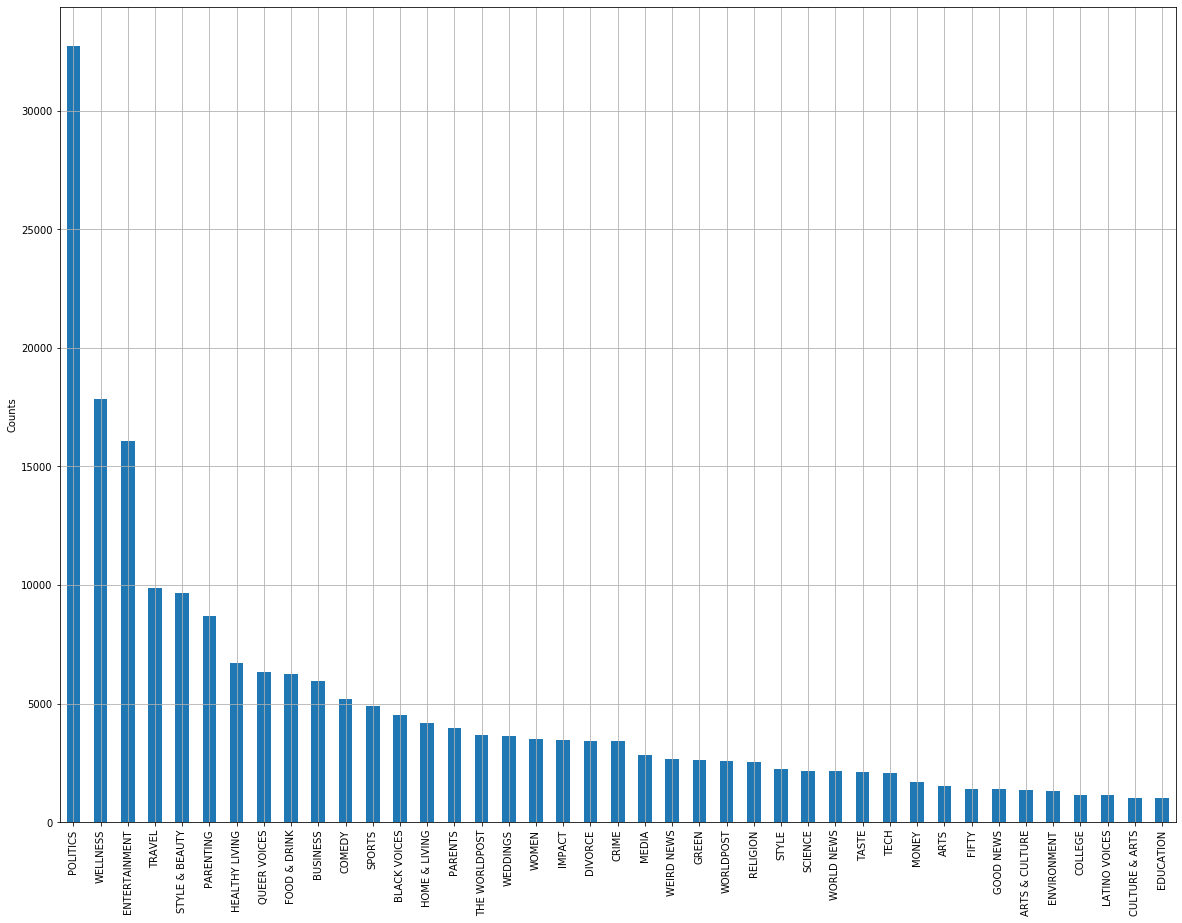

In [10]:
coun.plot( kind='bar', figsize=(20,15))
plt.grid()
plt.ylabel('Counts')
plt.savefig('bars.pdf')

In [11]:
coun1=df['authors'].value_counts()
print(coun1)

                                                                                                36620
Lee Moran                                                                                        2423
Ron Dicker                                                                                       1913
Reuters, Reuters                                                                                 1562
Ed Mazza                                                                                         1322
                                                                                                ...  
Jaweed Kaleem and Carol Kuruvilla                                                                   1
Mort Gerberg, Contributor\nMort Gerberg is a longtime cartoonist and author best known fo...        1
Brenda Mejia, ContributorTravel and sports blogger/writer at Traveleira.com                         1
Kelsey Louie, ContributorChief Executive Officer Gay Men's Health Crisis          

In [12]:
import numpy as np
import re
import nltk
import pickle
from nltk.corpus import stopwords

In [13]:
df['New']=df['headline']+ ".  " +df["short_description"]

In [14]:
df['New'][200852]

'Dwight Howard Rips Teammates After Magic Loss To Hornets.  The five-time all-star center tore into his teammates Friday night after Orlando committed 23 turnovers en route to losing'

In [15]:
df['New']=df['New'].str.lower()

In [16]:
df['New']

0         there were 2 mass shootings in texas last week...
1         will smith joins diplo and nicky jam for the 2...
2         hugh grant marries for the first time at age 5...
3         jim carrey blasts 'castrato' adam schiff and d...
4         julianna margulies uses donald trump poop bags...
                                ...                        
200848    rim ceo thorsten heins' 'significant' plans fo...
200849    maria sharapova stunned by victoria azarenka i...
200850    giants over patriots, jets over colts among  m...
200851    aldon smith arrested: 49ers linebacker busted ...
200852    dwight howard rips teammates after magic loss ...
Name: New, Length: 200853, dtype: object

In [17]:
df.head()

,category,headline,authors,link,short_description,date,New
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,there were 2 mass shootings in texas last week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,will smith joins diplo and nicky jam for the 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries for the first time at age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,jim carrey blasts 'castrato' adam schiff and d...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies uses donald trump poop bags...
